In [1]:
# Our standard packages
import pandas as pd

## Python Wrappers for APIs

What the heck is an API? Instead of reading through a bunch of sentences watch this video, https://www.youtube.com/watch?v=s7wmiS2mSXY, it explains the concept of an API in a great way.

Now these APIs exist for many of your favorite services like Twitter, Reddit, Spotify, and more. Now for a number of sites you'd have to write your own code to interact with the API, however, for the most popular digital services someone else has already done that for us. We'll go through a couple different examples of python wrappers for APIs.

### Public APIs, No Credentials Needed

We'll start off with public APIs that don't require any credentials. One fine example is `nba_api`. This package is a python wrapper for the nba stats API. You can find its documentation here on github, https://github.com/swar/nba_api. We'll now show how we can grab nba shot chart data with `nba_api`. 

#### Chart Some Shots

Perhaps you've seen a shot chart like the one seen here, https://i.redd.it/6g9o1dwz1oc21.png. Maybe you'd like to make code to make a chart just like that, but how do you get the data? The data exists here, https://stats.nba.com, but as we said you don't want go copy and paste the data by hand, and beautiful soup code might be a hassle. Enter `nba_api`.

Unless you've already used `nba_api` you'll need to install before you continue.

In [3]:
# Run the following to check
import nba_api

We'll first grab a player to chart. Looking at the documentation you can find out that this is done using the `players.get_players()` method from the `stats.static` subpackage.

If you have a favorite player you can try to get their shots, if not just follow along.

In [4]:
# We'll first grab the player we want
from nba_api.stats.static import players

# Returns a list of all nba players
player_list = players.get_players()

# Returns the info for Cavs' Darius Garland 
garland = [player for player in player_list if player['full_name'] == 'Darius Garland'][0]

print(garland)

{'id': 1629636, 'full_name': 'Darius Garland', 'first_name': 'Darius', 'last_name': 'Garland', 'is_active': True}


With your player's id in hand we can now scrape all of their shot attempts that are available. Again looking at the documentation we can find that this is done with `shotchartdetail` from `nba_api.stats.endpoints`.

In [5]:
# Import the shotchartdetail
from nba_api.stats.endpoints import shotchartdetail

In [6]:
garland_shots = shotchartdetail.ShotChartDetail(player_id = garland['id'], team_id = 0, 
                                                season_nullable = '2019-20',season_type_all_star = 'Regular Season',
                                                context_measure_simple = 'FGA')

garland_shots

The output of the above code is a `ShotChartDetail` object. We can use this to produce a dataframe containing all of the shot locations with the method `get_data_frames()`.

In [8]:
garland_shots_df = garland_shots.get_data_frames()[0]

garland_shots_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900005,20,1629636,Darius Garland,1610612739,Cleveland Cavaliers,1,10,11,...,Right Side(R),8-16 ft.,13,84,100,1,0,20191023,ORL,CLE
1,Shot Chart Detail,0021900005,45,1629636,Darius Garland,1610612739,Cleveland Cavaliers,1,7,37,...,Right Side Center(RC),24+ ft.,28,149,245,1,1,20191023,ORL,CLE
2,Shot Chart Detail,0021900005,58,1629636,Darius Garland,1610612739,Cleveland Cavaliers,1,6,10,...,Center(C),8-16 ft.,15,12,158,1,0,20191023,ORL,CLE
3,Shot Chart Detail,0021900005,328,1629636,Darius Garland,1610612739,Cleveland Cavaliers,2,0,8,...,Left Side Center(LC),24+ ft.,25,-144,210,1,1,20191023,ORL,CLE
4,Shot Chart Detail,0021900005,345,1629636,Darius Garland,1610612739,Cleveland Cavaliers,3,11,19,...,Center(C),8-16 ft.,13,41,131,1,0,20191023,ORL,CLE


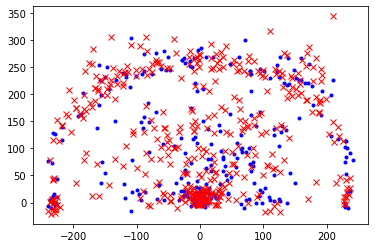

In [9]:
# Now we can plot!
import matplotlib.pyplot as plt
%matplotlib inline

shots_made = garland_shots_df.loc[garland_shots_df.SHOT_MADE_FLAG == 1,['LOC_X','LOC_Y']]
shots_missed = garland_shots_df.loc[garland_shots_df.SHOT_MADE_FLAG == 0,['LOC_X','LOC_Y']]

plt.plot(shots_made['LOC_X'], shots_made['LOC_Y'], 'b.')
plt.plot(shots_missed['LOC_X'], shots_missed['LOC_Y'], 'rx')
plt.show()

Now this doesn't look as nice as the shot chart we saw earlier, that requires more plotting code. 

### APIs That Require Credentials

The NBA stats API was easy enough, we were able to get the data without having to provide credentials. However, not all websites are that kind. For instance popular social media websites are very stingy with their data. These websites know that lots of people would be very interested in using their data to make apps and sell products using their users' data.

Let's go through an example where you'll need some credentials to gain access.

#### I Read it on Reddit

Reddit is a website that requires some credentials for API access. A popular python wrapper for their API is `praw` which stands for python Reddit API wrapper.


First you'll need an account, you can set up an account here, https://www.reddit.com. Next you can grab your credentials by creating an "app" here, https://www.reddit.com/prefs/apps. Note: In doing this you are agreeing not to use the data for commercial reasons. If you plan on developing an application in order to profit from Reddit data you need the explicit approval from Reddit. Don't mess around in this arena, you don't want a lawsuit on your hands.

##### Also do not share your credentials with anyone! Keep these private and never share them online.

I've stored my credentials on my local machine and will load them from a python file on my laptop. If you'd like to follow along with the code you'll need to enter your credentials by hand in the following block of code.

In [1]:
# Importing my credentials "package"
import get_auth

#import get_auth.ipynb

('TKyIW3b663vBTg', 'CdHomjM6pnb6KQByMnm1-AhYSWI', 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.122 Safari/537.36', 'sorasorakyuu', 'Pangding123')


In [2]:
client_id, client_secret, user_agent, username, password = get_auth.GiveRedditCred()

What are credentials? For Reddit once you've registered an app, you'll be given a client id, and a client secret. This help Reddit know who you are and what you're authorized to do. The user agent is a string, since we're just scraping data make it say something like `android:com.example.myredditapp:v1.2.3 (by /u/kemitche)`. The username is your Reddit username.

Once your credentials are set we can get going!

In [3]:
# Check that praw is properly installed
import praw

Before we can scrape data we have to make a read-only instance of Reddit. This just means we'll be accessing the Reddit API and we'll only be reading the existing data, i.e. we aren't making a Reddit bot.

In [7]:
# Make the read only instance
reddit = praw.Reddit(client_id = client_id,
                     client_secret = client_secret,
                     password = password,
                     user_agent = user_agent, 
                     username = username)

In [8]:
# Test to see that we correctly did it
# You should see True
print(reddit.read_only)
print(reddit.user.me())


False
sorasorakyuu


In [9]:
# Choose a subreddit you like here
# We'll default with /r/awww
subreddit = "awww"

# This turns creates a subreddit object
# then pull the top 5 best submissions at the time it was pulled
# then stores them in a list



In [10]:
top_5 = list(reddit.subreddit(subreddit).top(limit=5,time_filter='day'))
top_5

[Submission(id='ghqzmc'),
 Submission(id='gi0jyx'),
 Submission(id='gi88yf'),
 Submission(id='ghsunc'),
 Submission(id='ghvjz4')]

Let's look at the third post

In [11]:
post = top_5[2]

print(dir(post))

['STR_FIELD', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chunk', '_comments_by_id', '_fetch', '_fetch_data', '_fetch_info', '_fetched', '_kind', '_reddit', '_reset_attributes', '_safely_add_arguments', '_url_parts', '_vote', 'all_awardings', 'allow_live_comments', 'approved_at_utc', 'approved_by', 'archived', 'author', 'author_flair_background_color', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_template_id', 'author_flair_text', 'author_flair_text_color', 'author_flair_type', 'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders', 'banned_at_utc', 'banned_by', 'can_gild', 'can_mod_post', 'category', 'clear_vote', 'clicked', 'comment_lim

In [12]:
print(str(post.author) + ":", post.title)

Dear_Field: Mirror, mirror on the wall, who's the prettiest of them all?


We can even look at the comments.

In [13]:
i = 0
for comment in post.comments:
    if i < 5:
        print(i,str(comment.author) + ": ",comment.author_flair_text,":", comment.body)
        print()
    else:
        break
    i = i + 1

0 Cindiiiiiiii:  None : I think you mean *purrrr*diest of them all

1 PirateboarderLife:  None : Pretty Kitty

2 penguiniweenie:  None : YOU ARE! I WOULD DIE FOR YOU OMG!

3 Sakura327:  None : Wow that is a really cute kitty, love the angle.

4 johnboy2978:  None : Feelin' cute.  May chase some mice later.

